###  1.	Using any CSP (Constraint Satisfaction Problem) framework (using variables, value domains, and constraints), discover if the above problems can be solved and if so detail who would be in hired.




Ciara is looking for employees for her new company, which develops and provides AI based logistic software for retailers. Ciara has determined that she needs:

2 Python Programmers, 2 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer.
Assume that if a person has two abilities, he or she can take on two roles in the company.

So Ciara narrowed down her selections to the following people:

- __Name & Abilities__
- Peter : Python and AI
- Juan : Web and AI
- Jim : AI and Systems
- Jane : Python and Database
- Mary : Web and Systems
- Bruce : Systems and Python
- Anita : Web and AI

### Scenario 1:

Suppose Ciara knows Python, and only has funds to hire __three__ more people.



### Code Explanation

- **`itertools.combinations`**: 
  - _Usage_: This function from the itertools module generates all possible combinations of a specified length from the input iterable. It's used here to explore every potential team composition from the pool of candidates.
  - _Source_: Python 3.12.1 documentation

- **`variables_domain`**: 
  - _Description_: A dictionary where the keys are the names of the candidates, excluding Ciara, whose role is fixed, and the values are sets of their skills. It represents the pool of potential hires from which we want to find the valid combinations of employees.

- **`constraints`**: 
  - _Description_: A Counter dictionary representing the required roles for the project. It's adjusted to account for Ciara's guaranteed contribution as a Python programmer by reducing the Python requirement by one. It ensures that the final team composition meets the project's skill requirements.

- **`get_all_valid_combinations` function**: 
  - _Description_: This function is the heart of the script. It iterates through all possible combinations of three candidates (since Ciara is fixed), checking if the combination of their skills fulfills the project's constraints. It uses a Counter to tally the skills for each combination and compares this against the `constraints` to determine if it's a valid team setup.

- **`valid_combinations`**: 
  - _Description_: A list that is populated with each successful combination that meets the project's skill criteria. Each entry includes the combination of candidates that together fulfill all the roles required for the project, ensuring that Ciara is always included as a Python programmer.


In [1]:
from itertools import combinations
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Adjusted variables and domain of the problem where variables = people, and domain = roles;
variables_domain = {
    "Peter": {"Python", "AI"},
    "Juan": {"Web", "AI"}, 
    "Jim": {"AI", "Systems"},
    "Jane": {"Python", "Database"},
    "Mary": {"Web", "Systems"},
    "Bruce": {"Systems", "Python"},
    "Anita": {"Web", "AI"}, 
    "Ciara": {"Python"}  
}

# Defined roles that have to be occupied by people with the additional constraint that Ciara is selected for Python
constraints = Counter({"Python": 2, "AI": 2, "Web": 1, "Database": 1, "Systems": 1})  # Python reduced to 1 because Ciara is taking one spot

# Function to find all valid combinations of employees who can cover the required roles considering Ciara for Python
def get_all_valid_combinations(variables_domain, constraints):
    valid_combinations = []

    # Iterate through combinations of the other 3 people, as Ciara is fixed for Python
    for combo in combinations(variables_domain.keys(), 3):  # Selecting 3 other people
        # Tally abilities for this combination
        abilities = Counter({"Python": 1})  # Starting with Ciara's contribution for Python
        for person in combo:
            abilities.update(variables_domain[person])

        # Check if the combination covers all roles
        if all(abilities[role] >= count for role, count in constraints.items()):
            valid_combinations.append(("Ciara",) + combo)  # Adding Ciara to the valid combination

    return valid_combinations

# Get all valid combinations of people that can cover the needed roles
all_valid_combinations = get_all_valid_combinations(variables_domain, constraints)
print(all_valid_combinations)




[('Ciara', 'Juan', 'Jim', 'Jane'), ('Ciara', 'Jim', 'Jane', 'Anita')]


__Variables__: The variables are the people (Peter, Juan, Jim, Jane, Mary, Bruce, Anita). Each person represents a variable that needs to be assigned a role based on their abilities.

__Value Domains__: The domain of each variable (person) is their set of abilities. For example, the domain for Peter is {"Python", "AI"}.

__Constraints__:
- Each person can be assigned only to roles matching their abilities.
- The total number of people hired should be three (excluding Ciara).
- The required roles in the company (_'constraints'_) must all be filled. This includes 1 Python Programmer (after accounting - for Ciara's skill), 2 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer.


### Scenario 2:

Suppose Ciara and Juan become partners, with the additional funds they can now employ four more people but must employ another AI Engineer, so they need 2 Python Programmers, 3 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer.


### Code Explanation

- **`constraint_2`**: 
  - _Description_: A dictionary representing the required skills or roles for the project. Each skill has a corresponding number indicating how many people with that skill are needed.
  - _Adjustments_: The required count for each skill is adjusted to account for the skills of pre-selected individuals like Ciara and Juan.

- **`pre_selected`**:
  - _Description_: A set of individuals who are pre-selected for the team due to their specific skills or other constraints. For instance, Ciara is always selected for her Python skill.
  - _Operation_: The script adjusts the `variables_domain` and `constraint_2` based on the skills of these pre-selected individuals.

- **Removing pre-selected individuals**:
  - _Process_: The script iteratively removes pre-selected individuals from the `variables_domain` and adjusts the `constraint_2` accordingly to reflect their contribution to the required skills.

- **`meets_requirements` function**: 
  - _Description_: A function that checks if a particular combination of people meets the required skills. It tallies the skills of the combination and compares this against the `constraint_2` to determine if it's a valid team setup.
  - _Process_: 
    1. Initialize a count for each required skill.
    2. Tally the skills for each individual in the combination.
    3. Compare the tally against the requirements in `constraint_2`.

- **Generating Possible Teams**:
  - _Description_: The script generates all combinations of 1 to 4 people from the remaining candidates (not including pre-selected ones) and checks each combination to see if it meets the required skills.
  - _Storage_: Valid combinations that meet all requirements are stored in `possible_teams`, each including the pre-selected individuals.

- **`possible_teams`**:
  - _Description_: A list that stores each team combination that successfully covers all the required skills. Each team includes the pre-selected individuals along with the combination of other candidates that, together, fulfill all role requirements.


In [2]:
from itertools import combinations

# Define the required skills
constraint_2 = {"Python": 2, "AI": 3, "Web": 1, "Database": 1, "Systems": 1}

# Pre-selected individuals
pre_selected = {"Ciara", "Juan"}

# Remove pre-selected individuals from domain
for person in pre_selected:
    # Reduce the count of required skills based on pre-selected individuals
    for skill in variables_domain[person]:
        if skill in constraint_2:
            constraint_2[skill] -= 1
    del variables_domain[person]

# Function to check if a combination of people meets the required skills
def meets_requirements(people, constraint_2, domains):
    skills_count = {skill: 0 for skill in constraint_2}
    for person in people:
        for skill in domains[person]:
            if skill in skills_count:
                skills_count[skill] += 1
    # Check if all required skills are met or exceeded
    return all(skills_count[skill] >= constraint_2[skill] for skill in constraint_2)

# Generate all possible combinations of 4 or fewer people from the remaining candidates
possible_teams = []
for r in range(1, 5):  # Up to 4 extra people
    for team in combinations(variables_domain.keys(), r):
        if meets_requirements(team, constraint_2, variables_domain):
            possible_teams.append(pre_selected.union(team))  # Add pre-selected individuals to the team

possible_teams



[{'Ciara', 'Jane', 'Jim', 'Juan', 'Peter'},
 {'Anita', 'Ciara', 'Jane', 'Jim', 'Juan'},
 {'Ciara', 'Jane', 'Jim', 'Juan', 'Mary', 'Peter'},
 {'Bruce', 'Ciara', 'Jane', 'Jim', 'Juan', 'Peter'},
 {'Anita', 'Ciara', 'Jane', 'Jim', 'Juan', 'Peter'},
 {'Anita', 'Ciara', 'Jane', 'Juan', 'Mary', 'Peter'},
 {'Anita', 'Bruce', 'Ciara', 'Jane', 'Juan', 'Peter'},
 {'Anita', 'Ciara', 'Jane', 'Jim', 'Juan', 'Mary'},
 {'Anita', 'Bruce', 'Ciara', 'Jane', 'Jim', 'Juan'}]

In [3]:
# Convert the possible_teams list of sets into a list of lists for easier handling
team_lists = [list(team) for team in possible_teams]

# Create a DataFrame from the team lists
team_df = pd.DataFrame(team_lists)

# If teams have different sizes, fill the missing values with None or a placeholder
team_df = team_df.fillna("None")

# Rename columns to reflect team member positions
team_df.columns = [f"Hired {i+1}" for i in range(team_df.shape[1])]

team_df

,Hired 1,Hired 2,Hired 3,Hired 4,Hired 5,Hired 6
0,Jim,Jane,Juan,Ciara,Peter,None
1,Anita,Jim,Jane,Juan,Ciara,None
2,Jim,Mary,Jane,Juan,Ciara,Peter
3,Jim,Jane,Bruce,Juan,Ciara,Peter
4,Anita,Jim,Jane,Juan,Ciara,Peter
5,Anita,Mary,Jane,Juan,Ciara,Peter
6,Anita,Jane,Bruce,Juan,Ciara,Peter
7,Anita,Jim,Mary,Jane,Juan,Ciara
8,Anita,Jim,Jane,Bruce,Juan,Ciara


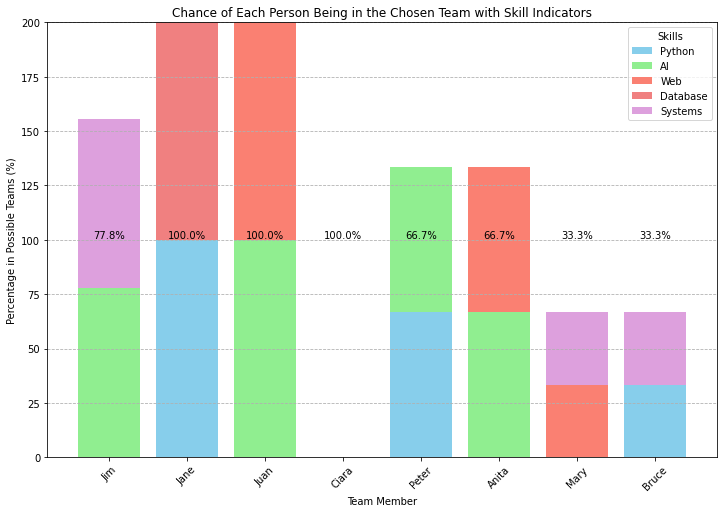

In [7]:
# Flatten the list of all team combinations to count the frequency of each member
flattened_teams = [member for team in team_lists for member in team]

# Count the frequency of each member
member_frequency = Counter(flattened_teams)

# Convert to percentage of total possible teams for better understanding
total_teams = len(team_lists)
member_percentage = {member: (count / total_teams) * 100 for member, count in member_frequency.items()}

# Define a color for each skill
skill_colors = {
    "Python": "skyblue",
    "AI": "lightgreen",
    "Web": "salmon",
    "Database": "lightcoral",
    "Systems": "plum"
}

# Update the section of the code for preparing data for the stacked bar chart using 'variables_domain'
stack_data = {skill: [] for skill in skill_colors}
for member in member_frequency.keys():
    # Initialize count for all skills to zero for each member
    member_skills_count = {skill: 0 for skill in skill_colors}
    for skill in variables_domain.get(member, {}):
        if skill in member_skills_count:
            # If member has the skill, set the count proportionally based on their frequency
            member_skills_count[skill] = member_frequency[member]
    # Append the count to respective skill data for stacked bar chart
    for skill, count in member_skills_count.items():
        stack_data[skill].append(count / total_teams * 100)  # Convert count to percentage

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bottoms = [0] * len(member_frequency)  # Initialize bottoms for the bar stacks

for skill, color in skill_colors.items():
    ax.bar(member_frequency.keys(), stack_data[skill], bottom=bottoms, color=color, label=skill)
    # Update bottoms for next skill stack
    bottoms = [bottom + stack for bottom, stack in zip(bottoms, stack_data[skill])]

# Adding percentage labels
for i, (member, percentage) in enumerate(member_percentage.items()):
    plt.text(i, 100, f"{percentage:.1f}%", ha='center', va='bottom')

# Labeling the chart
ax.set_xlabel('Team Member')
ax.set_ylabel('Percentage in Possible Teams (%)')
ax.set_title('Chance of Each Person Being in the Chosen Team with Skill Indicators')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.grid(axis='y', linestyle='--')

# Add legend for skills
ax.legend(title="Skills")

plt.show()


### 2.	Discuss in detail how using Constraint Satisfaction finds an answer or finds no solution to the problems in Tasks for Artificial Intelligence part 1. How does this differ from standard algorithmic solutions? 

### Constraint Satisfaction Problem (CSP)

A Constraint Satisfaction Problem (CSP) involves finding a solution that satisfies a number of constraints or conditions. It is widely used in fields like artificial intelligence for scheduling, assigning, and planning problems. CSPs typically involve variables, domains for each variable, and constraints that describe allowable combinations of values. The goal is to assign values to all variables in a way that doesn't violate any constraints (Russell & Norvig, 2010). This framework is particularly effective in scenarios like employee scheduling, where multiple conditions must be met simultaneously.

"According to Barták (n.d.), even though constraint programming has been studied since 1974 in Artificial Intelligence, the software used for solving optimization problems in areas like planning and scheduling is relatively new. The Association for Computing Machinery (ACM) has named it one of the key paths in computer science, recognizing that it is one of the most exciting advances in programming languages in the past ten years."

Wikipedia, 
- _A Constraint Satisfaction Problem (CSP) is typically defined by three fundamental components:_

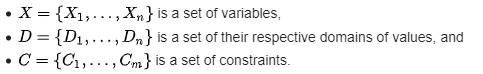

1. **Variables (X):**
   - Each potencial person: Peter, Juan, Jim, Jane, Mary, Bruce, Anita and Ciara).
   - Each variable can take on values from a domain.

2. **Domains (D):**
   - Each domain is a set of possible values that its corresponding variable can assume. In this case, the abilities each person (Variables) has. 
   - Domains can be finite or infinite, depending on the specific CSP.

3. **Constraints (C):**
   - Each constraint involves some subset of the variables and specifies the allowable combinations of values those variables can take. Constraints can be represented in various ways, including explicit lists of allowable combinations (extensional constraints) or more general mathematical relations or logical propositions (intensional constraints).
   
 - **Scenario 1:**
   1. There must be 2 Python Programmers, 2 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer;
   2. Ciara knows Python, so 1 Python role is taken (remaining 1);
   3. The company can hire only 3 people to fill the rest of the roles. 
   
   - **Scenario 2:**
   1. There must be 2 Python Programmers, 3 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer;
   2. This time, Juan and Ciara have to be on the list of hired people with their respective abilities.
   3. The company can hire max of 4 people for the rest of the roles.
   

### Objective:

The objective of a CSP is to find an assignment of values to variables that satisfies all constraints. 

### Solution:

- The CSP algorithm would try different combinations of the candidates, assigning them to various roles while ensuring all constraints are met.
- A solution to the CSP is an assignment of values to all variables that does not violate any constraints. Depending on the problem, there might be none, one, or many possible solutions. 
- It will use backtracking and other CSP strategies to explore possible configurations.
- Scenario 1 found only two solutions. The reason is that only 3 people were hired to fulfill 6 roles, making the constraints harder to satisfy.
- Scenario 2 found close to ten solutions. The reason is that Juan is now Ciara's partner, and both must be part of the hired team. Now, the constraints are much easier to satisfy, as there are 5 abilities left to be distributed among 4 people.

### Conclusion

Most algorithms for solving CSPs search systematically through the possible assignments of values to variables. These algorithms are goint to find a solution, if one exists, or to prove that the problem is unsatisfiable. (Brailsford, Potts & Smith, 1999)

CSPs are a powerful abstract model for representing and solving many real-world problems in various fields such as scheduling, planning, resource allocation, configuration, and spatial reasoning. They offer a structured way to break down complex problems into manageable components (variables, domains, and constraints) and apply systematic methods to find solutions.

## Integer Linear Programming (ILP)

The assumption of divisibility, which limits decision variables to noninteger values, is the main drawback of linear programming. However, in several real-world situations, decision variables needs to have integer values such as assigning people, machines, or vehicles to activities. (Hillier & Lieberman, 2010)

Integer Linear Programming (ILP) is a type of mathematical optimization or feasibility program used to find the best solution out of a set of possible solutions. In ILP:

- Variables are restricted to be integers.
- The objective is often to minimize or maximize some linear function of those integers.

### How ILP Works:

1. **Variable Definition:** 
   - Each variable represents a decision point. For example, in a resource allocation problem, a variable could represent whether a person is assigned to a particular role (1 for yes, 0 for no).

2. **Constraints:**
   - ILP requires defining constraints that all solutions must meet. These can ensure that resources aren't over-allocated, that conditions like total cost are maintained within limits, and that only feasible solutions are considered.
   - Common constraints include ensuring the correct number of roles are filled or that no person is assigned to incompatible roles according to their abilities.

3. **Objective Function:**
   - The objective function is what you want to optimize, such as minimizing costs or maximizing efficiency. In some cases, the objective might simply be to find any feasible solution that meets the constraints.

### Advantages of ILP:

- **Optimality:** ILP can provide the best possible solution according to the objective function and within the constraints.
- **Flexibility:** It can handle a wide variety of problem types, including complex and large-scale problems.
- **Universality:** ILP models are widely applicable in numerous fields such as scheduling, resource allocation, budgeting, etc.

### Considerations:

The inconsistency of Integer Linear Programming (ILP) algorithms in solving integer problems represents a notable drawback. While theoretical demonstrations assert these algorithms' convergence within a finite number of iterations, practical implementation on computers can yield a different experience. As such, it's important to consider these computational limitations and the potential for inconsistency when examining and applying ILP algorithms.(Taha, 2017).

- **Complexity:** Formulating an ILP can be complex and requires a thorough understanding of the problem and constraints.
- **Computational Intensity:** For large or complex problems, solving an ILP can be computationally intensive.

In summary, ILP is a powerful tool for optimization problems where variables are integers, especially effective in finding optimal solutions within a defined set of constraints.


In [5]:
from pulp import LpProblem, LpVariable, LpMinimize, lpSum, LpStatus

# Variables and their domains (abilities)
variables_domain = {
    "Peter": {"Python", "AI"},
    "Juan": {"Web", "AI"},
    "Jim": {"AI", "Systems"},
    "Jane": {"Python", "Database"},
    "Mary": {"Web", "Systems"},
    "Bruce": {"Systems", "Python"},
    "Anita": {"Web", "AI"}
}

# Defined roles that need to be filled, considering Ciara's contribution
role_needs = {"Python": 1, "AI": 2, "Web": 1, "Database": 1, "Systems": 1}

# Initialize the problem
prob = LpProblem("Scenario_1", LpMinimize)

# Define variables: x[person, role] is 1 if the person is assigned to the role
x = LpVariable.dicts("assignment", [(person, role) for person in variables_domain for role in variables_domain[person]], cat='Binary')

# Define a helper variable for each person indicating if they are hired
hired = LpVariable.dicts("hired", variables_domain.keys(), cat='Binary')

# Objective function: Minimize the number of people hired
prob += lpSum(hired[person] for person in variables_domain)

# Constraints

# Ensure each role has enough people
for role in role_needs:
    prob += lpSum(x[(person, role)] for person in variables_domain if role in variables_domain[person]) == role_needs[role]

# Link the hiring variable with the assignment variables
for person in variables_domain:
    prob += hired[person] * 2 == lpSum(x[(person, role)] for role in variables_domain[person])

# Ensure exactly 3 people are hired
prob += lpSum(hired[person] for person in variables_domain) == 3

# List to store all unique solutions
all_solutions = []

# Function to add constraints that block the previous solutions
def block_previous_solutions(prob, solutions, x):
    for solution in solutions:
        # Creating a unique constraint for each previous solution found
        prob += lpSum(x[person, role] for (person, role) in solution.keys() if solution[(person, role)] == 1) <= sum(solution.values()) - 1


while True:
    # Solve the problem
    prob.solve()

    # Check if a new solution is found
    if LpStatus[prob.status] == 'Optimal':
        # Extract the current solution
        current_solution = {(person, role): x[(person, role)].varValue for (person, role) in x.keys() if x[(person, role)].varValue == 1}

        # Check for uniqueness of the solution
        if current_solution not in all_solutions:
            all_solutions.append(current_solution)
            print("Solution #", len(all_solutions))
            
            # Print each person's name with their assigned roles
            assignments = {person: [] for person in variables_domain}
            for (person, role) in current_solution.keys():
                if current_solution[(person, role)] == 1:  # If the person is assigned to the role
                    assignments[person].append(role)  # Append the role to the person's list of roles

            # Print assignments
            for person, roles in assignments.items():
                if roles:  # If the person has roles assigned
                    print(f"{person} : {', '.join(roles)}")

            # Add a constraint to block the current solution
            block_previous_solutions(prob, [current_solution], x)

        else:
            # If the solution is already found, break the loop
            break
    else:
        # No more solutions are available
        break

print(f"Total {len(all_solutions)} unique solutions found.")


Solution # 1
Juan : AI, Web
Jim : AI, Systems
Jane : Database, Python
Solution # 2
Jim : AI, Systems
Jane : Database, Python
Anita : AI, Web
Total 2 unique solutions found.


## References
- Stuart Jonathan Russell; Peter Norvig (2010). Artificial Intelligence: A Modern Approach. Prentice Hall. p. Chapter 6. 
- docs.python.org. (n.d.). itertools — Functions creating iterators for efficient looping — Python 3.9.1 documentation. [online] Available at: https://docs.python.org/3/library/itertools.html.

- Barták, R. (n.d.). CONSTRAINT PROPAGATION AND BACKTRACKING-BASED SEARCH A brief introduction to mainstream techniques of constraint satisfaction. [online] Available at: https://ktiml.mff.cuni.cz/~bartak/downloads/CPschool05notes.pdf [Accessed 2 Mar. 2021].
- Wikipedia Contributors (2019). Constraint satisfaction problem. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Constraint_satisfaction_problem.

- www.cs.cmu.edu. (n.d.). Constraint Satisfaction Problems. [online] Available at: https://www.cs.cmu.edu/~15281/coursenotes/constraints/index.html [Accessed 28 Dec. 2023].

- Brailsford, S.C., Potts, C.N. and Smith, B.M. (1999). Constraint satisfaction problems: Algorithms and applications. European Journal of Operational Research, 119(3), pp.557–581. doi:https://doi.org/10.1016/s0377-2217(98)00364-6.

- https://docs.pulpproject.org/pulpcore/
- Taha, H.A. (2017). Operations research an introduction. Boston: Pearson.
- Rodriguez, T.S. (2022). Linear Programming: optimizing solutions with Python using PuLP. [online] Medium. Available at: https://medium.com/@telmosubirar/linear-programming-optimizing-solutions-with-python-using-pulp-e0c4379696c8 [Accessed 28 Dec. 2023].
- Hillier, F.S. and Lieberman, G.J. (2010). Introduction to operations research. New York, Ny: Mcgraw-Hill.
‌
